#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [2]:
train=pd.read_csv(r'/content/sample_data/CarPrice_Assignment.csv')
df=train.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [49]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [50]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [8]:
duplicated_rows = df[df.columns[1:]].duplicated().sum()
duplicated_rows

0

In [15]:
print(df.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


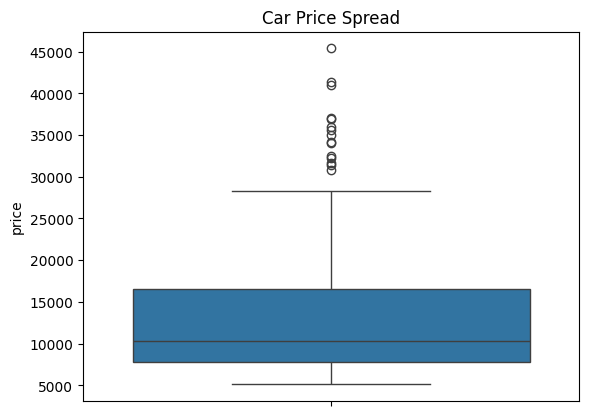

In [16]:
plt.title('Car Price Spread')
sns.boxplot(y=df.price)
plt.show()

<ipython-input-13-42ac88fb4196>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


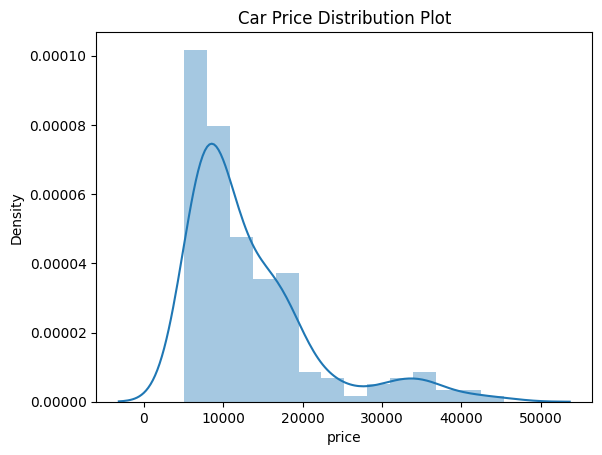

In [13]:
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)
plt.show()

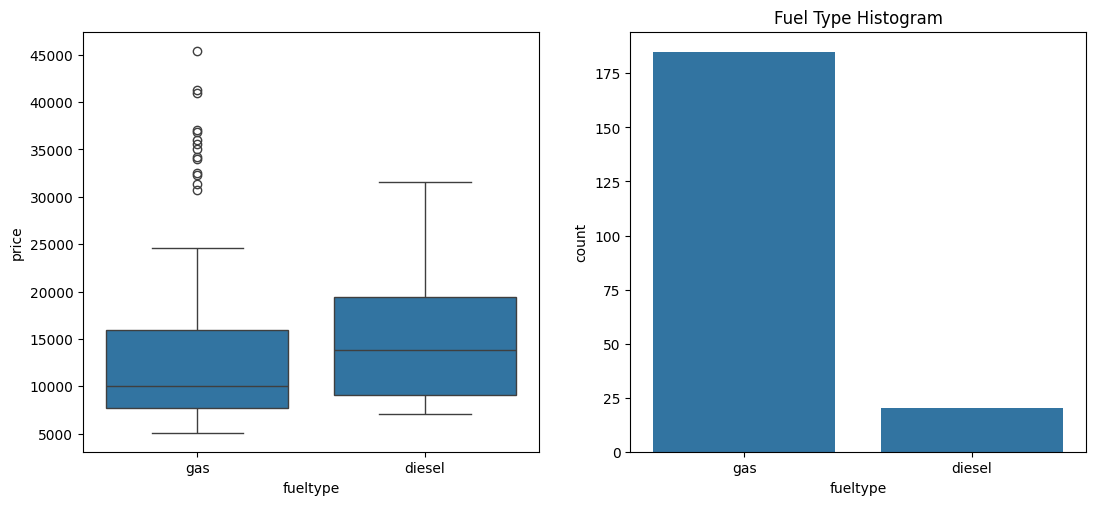

In [39]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df)

plt.subplot(2,3,2)
plt.title('Fuel Type Histogram')
order = df['fueltype'].value_counts(ascending=False).index
sns.countplot(x='fueltype', data=df, order=order)

plt.show()

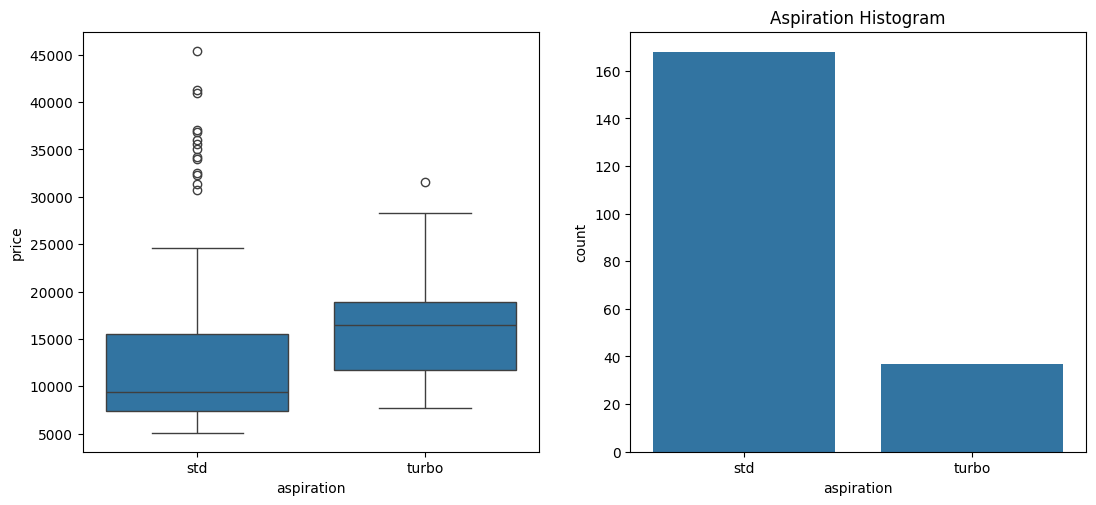

In [21]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'aspiration', y = 'price', data = df)

plt.subplot(2,3,2)
plt.title('Aspiration Histogram')
order = df['aspiration'].value_counts(ascending=False).index
sns.countplot(x='aspiration', data=df, order=order)

plt.show()

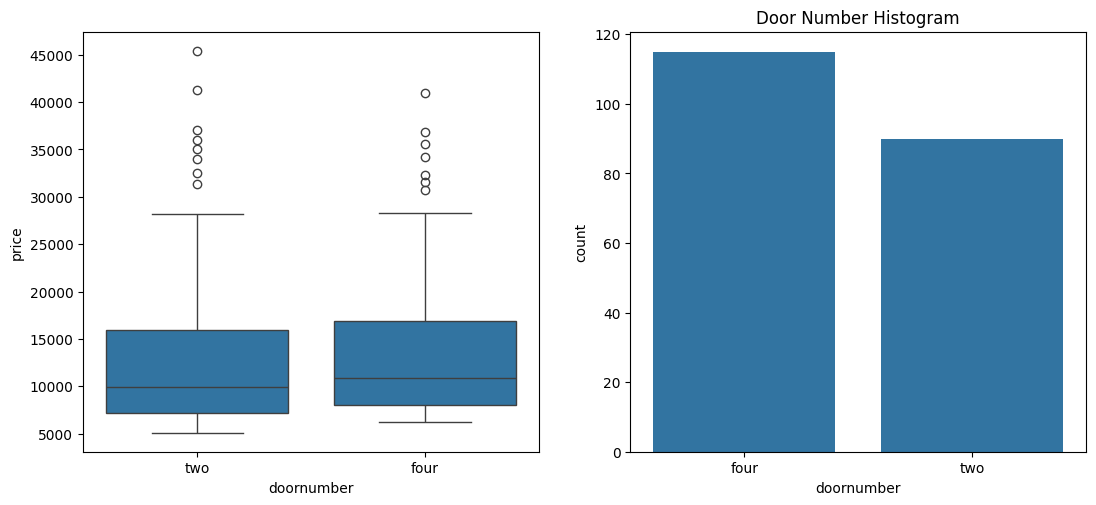

In [23]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)

plt.subplot(2,3,2)
plt.title('Door Number Histogram')
order = df['doornumber'].value_counts(ascending=False).index
sns.countplot(x='doornumber', data=df, order=order)

plt.show()

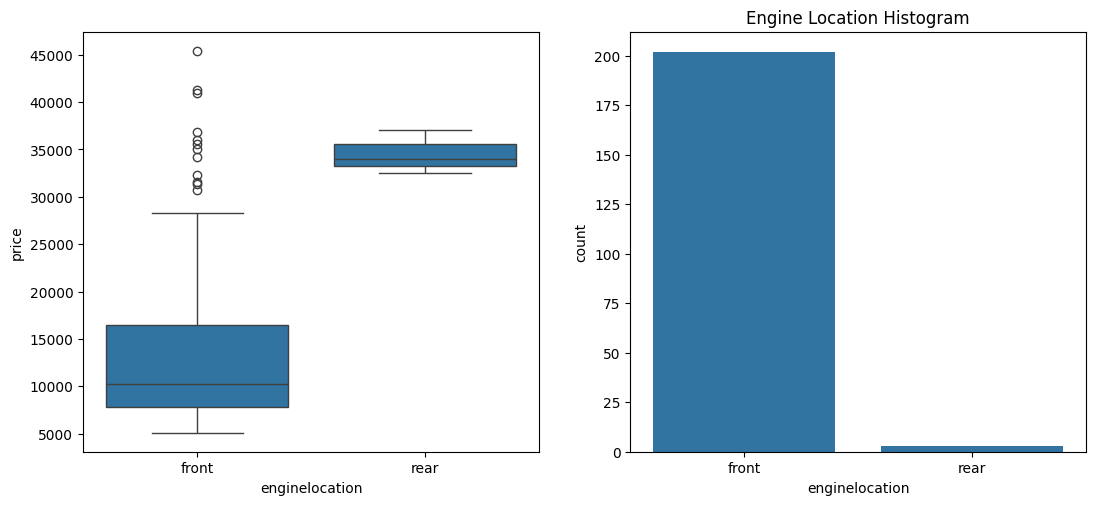

In [24]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)

plt.subplot(2,3,2)
plt.title('Engine Location Histogram')
order = df['enginelocation'].value_counts(ascending=False).index
sns.countplot(x='enginelocation', data=df, order=order)

plt.show()


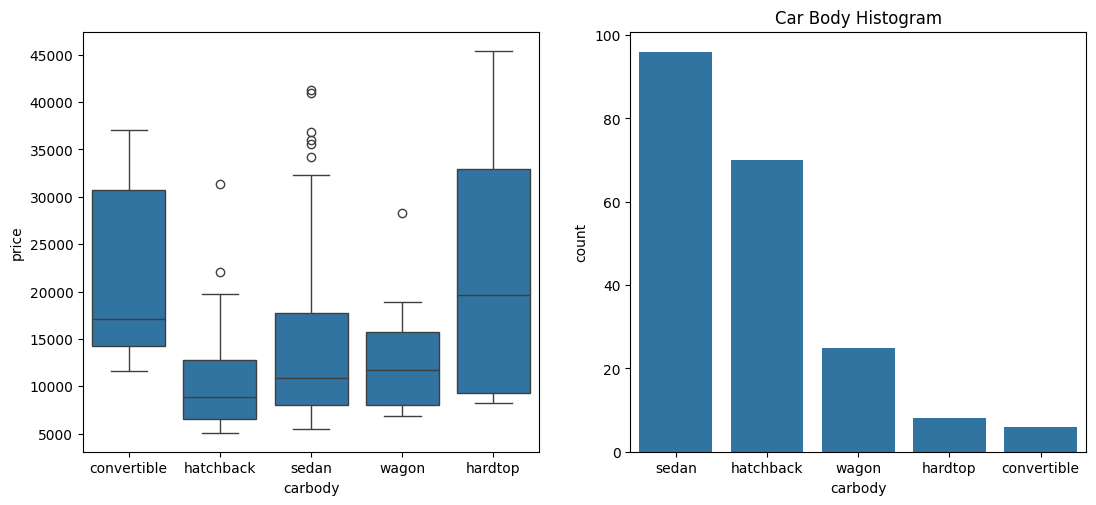

In [27]:
from collections import defaultdict
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='carbody',y='price',data = df)

plt.subplot(2,3,2)
plt.title('Car Body Histogram')
order = df['carbody'].value_counts(ascending=False).index
sns.countplot(x='carbody', data=df, order=order)

plt.show()

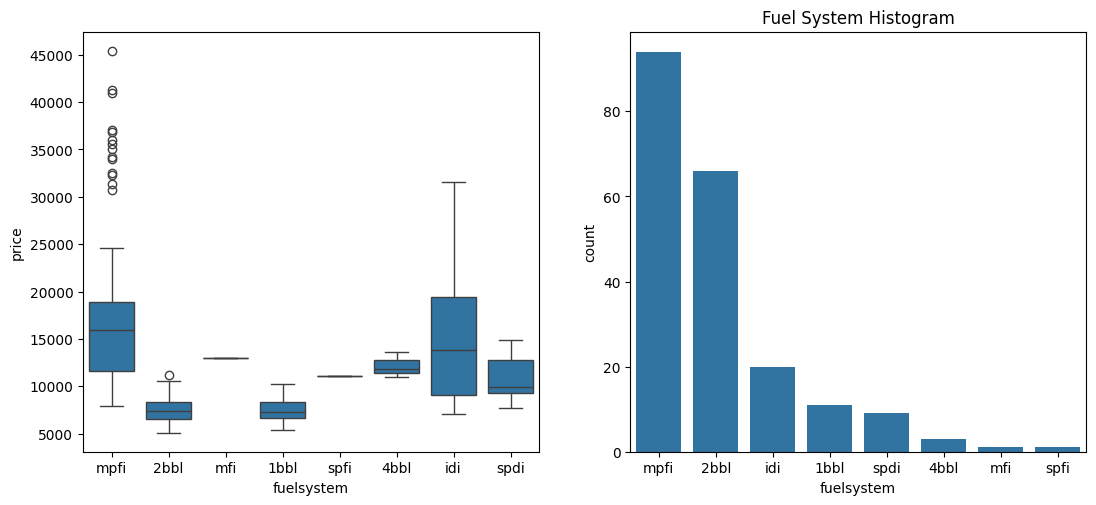

In [29]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='fuelsystem',y='price',data = df)

plt.subplot(2,3,2)
plt.title('Fuel System Histogram')
order = df['fuelsystem'].value_counts(ascending=False).index
sns.countplot(x='fuelsystem', data=df, order=order)

plt.show()

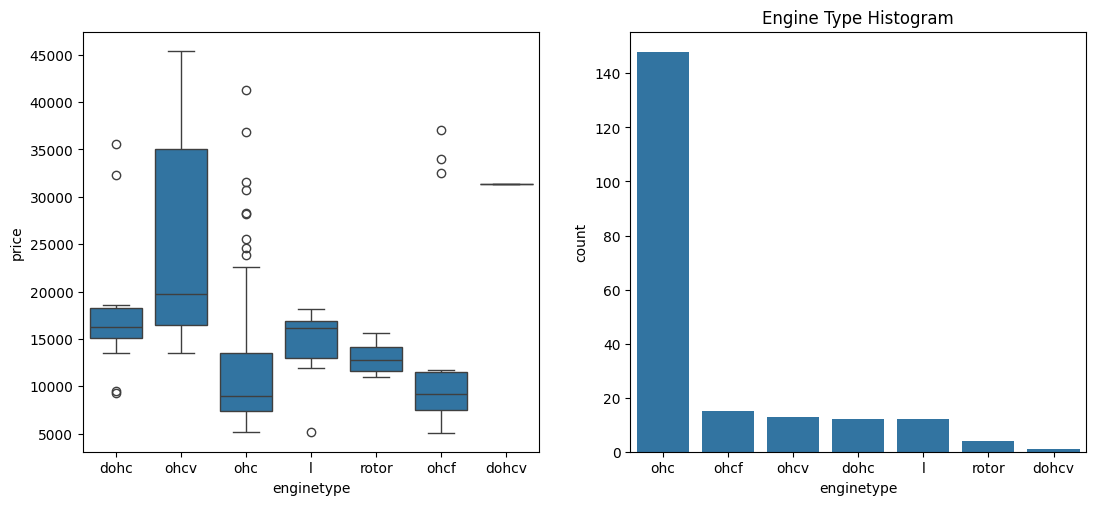

In [35]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='enginetype',y='price',data = df)

plt.subplot(2,3,2)
plt.title('Engine Type Histogram')
order = df['enginetype'].value_counts(ascending=False).index
sns.countplot(x='enginetype', data=df, order=order)

plt.show()

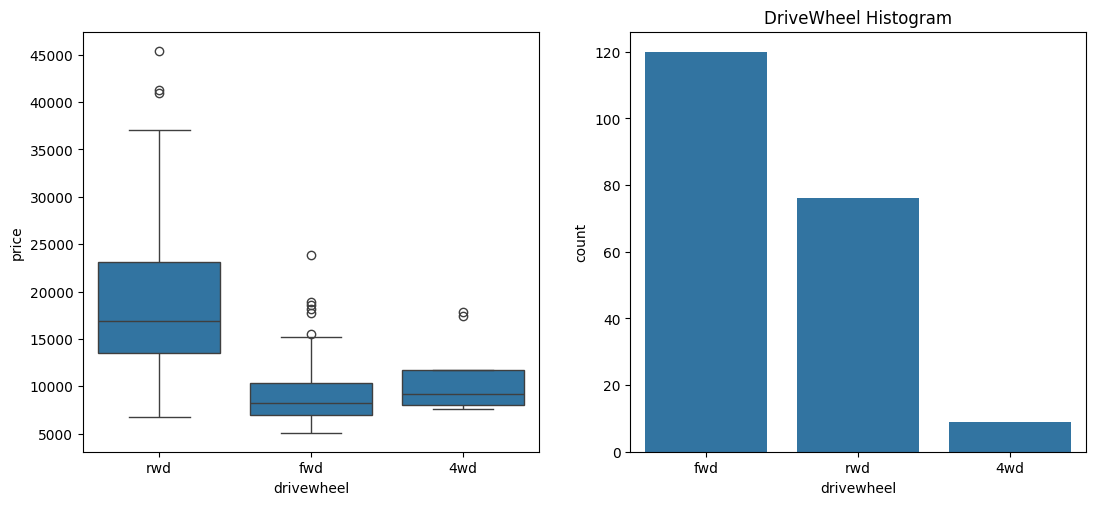

In [41]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)

plt.subplot(2,3,2)
plt.title('DriveWheel Histogram')
order = df['drivewheel'].value_counts(ascending=False).index
sns.countplot(x='drivewheel', data=df, order=order)

plt.show()

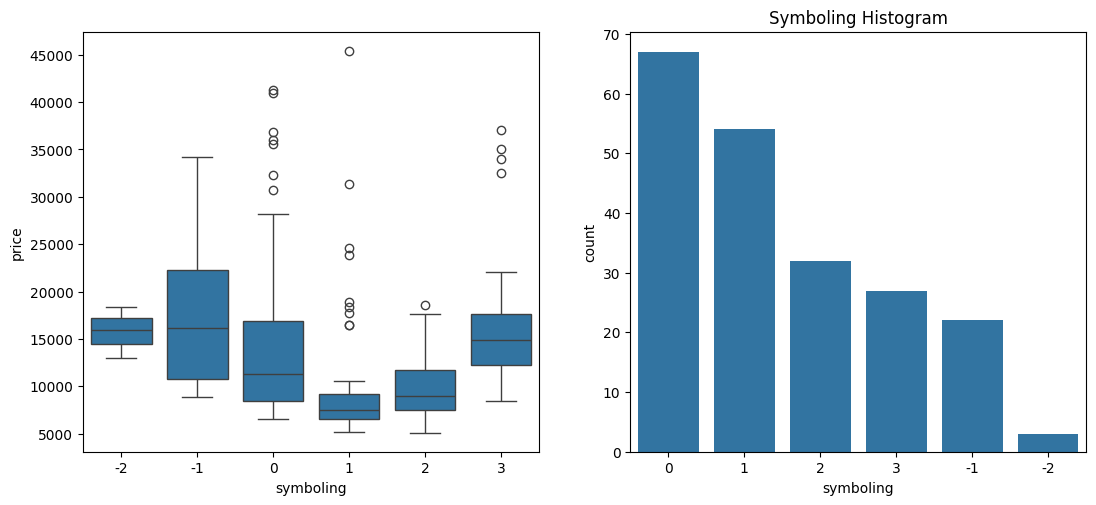

In [42]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x=df.symboling, y=df.price)


plt.subplot(2,3,2)
plt.title('Symboling Histogram')
order = df['symboling'].value_counts(ascending=False).index
sns.countplot(x='symboling', data=df, order=order)

plt.show()

<ipython-input-32-4a60d9549518>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette='mako', ax=axes[i], saturation=0.95)
<ipython-input-32-4a60d9549518>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette='mako', ax=axes[i], saturation=0.95)
<ipython-input-32-4a60d9549518>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette='mako', ax=axes[i], saturation=0.95)
<ipython-input-32-4a60d9549518>:10: FutureWarning: 

Passing `palette` without assigning `h

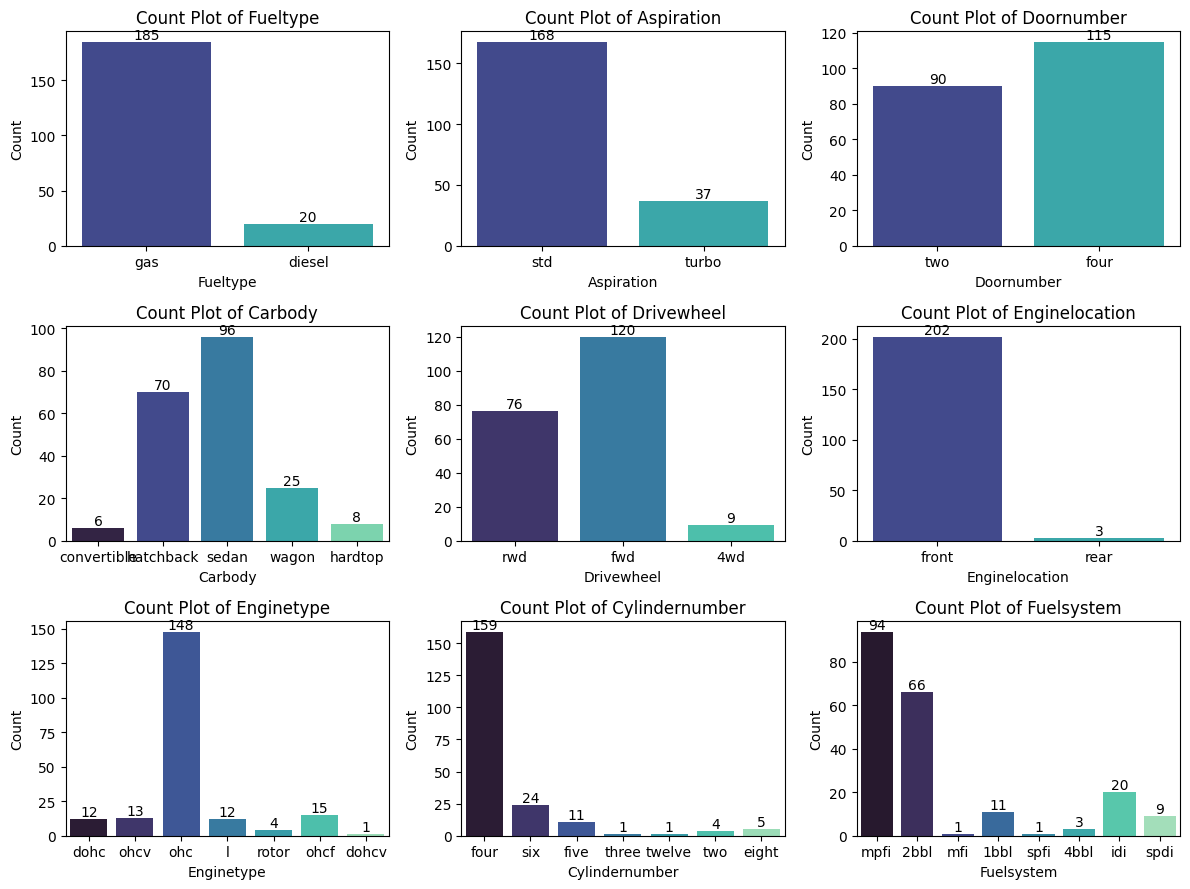

In [32]:
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='mako', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


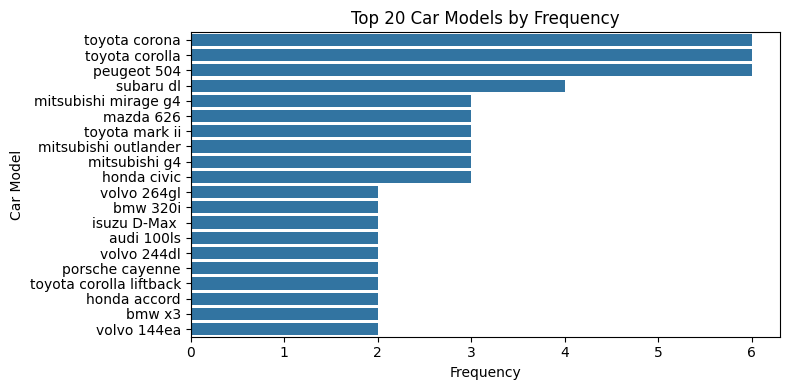

In [34]:
n = 20  # Number of top car models to plot
top_car_models = df['CarName'].value_counts().head(n)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

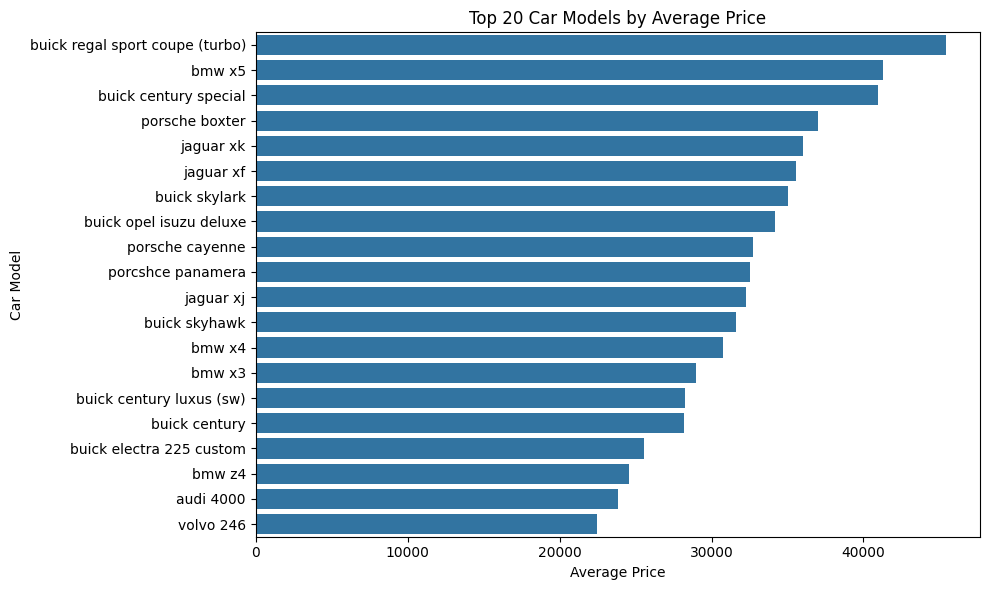

In [43]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

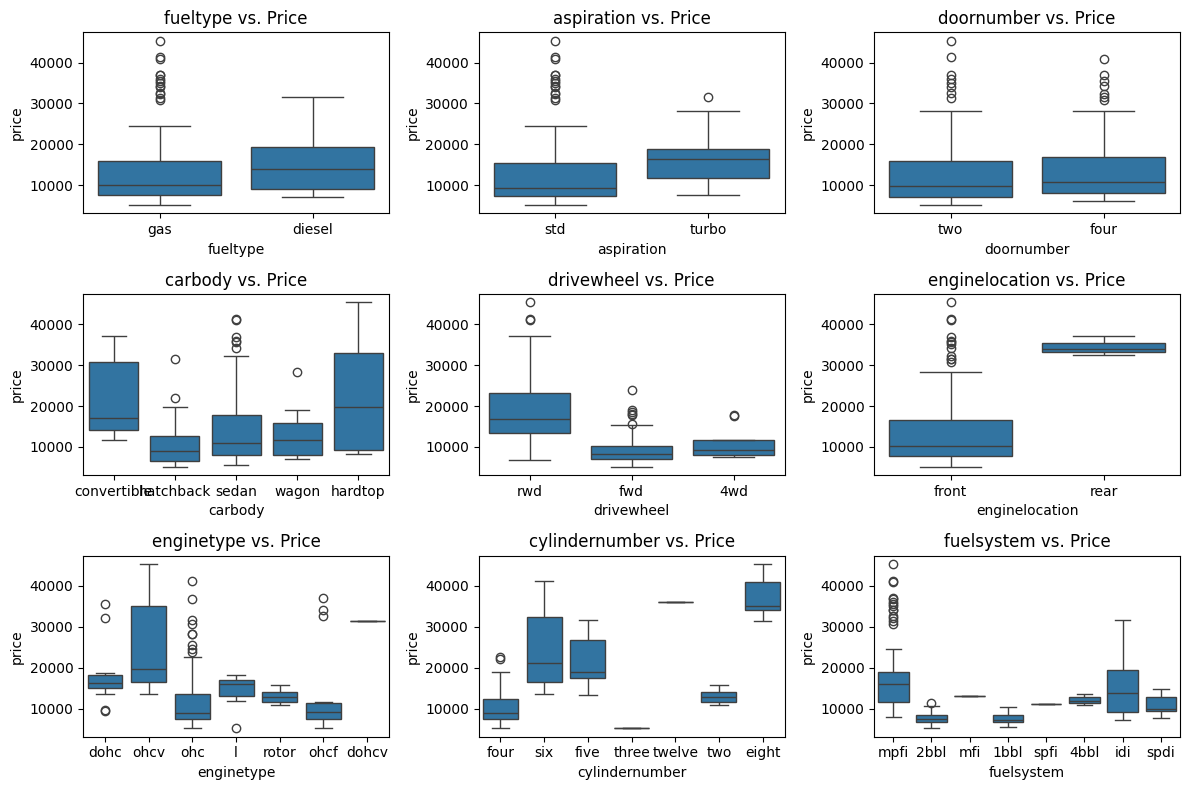

In [44]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

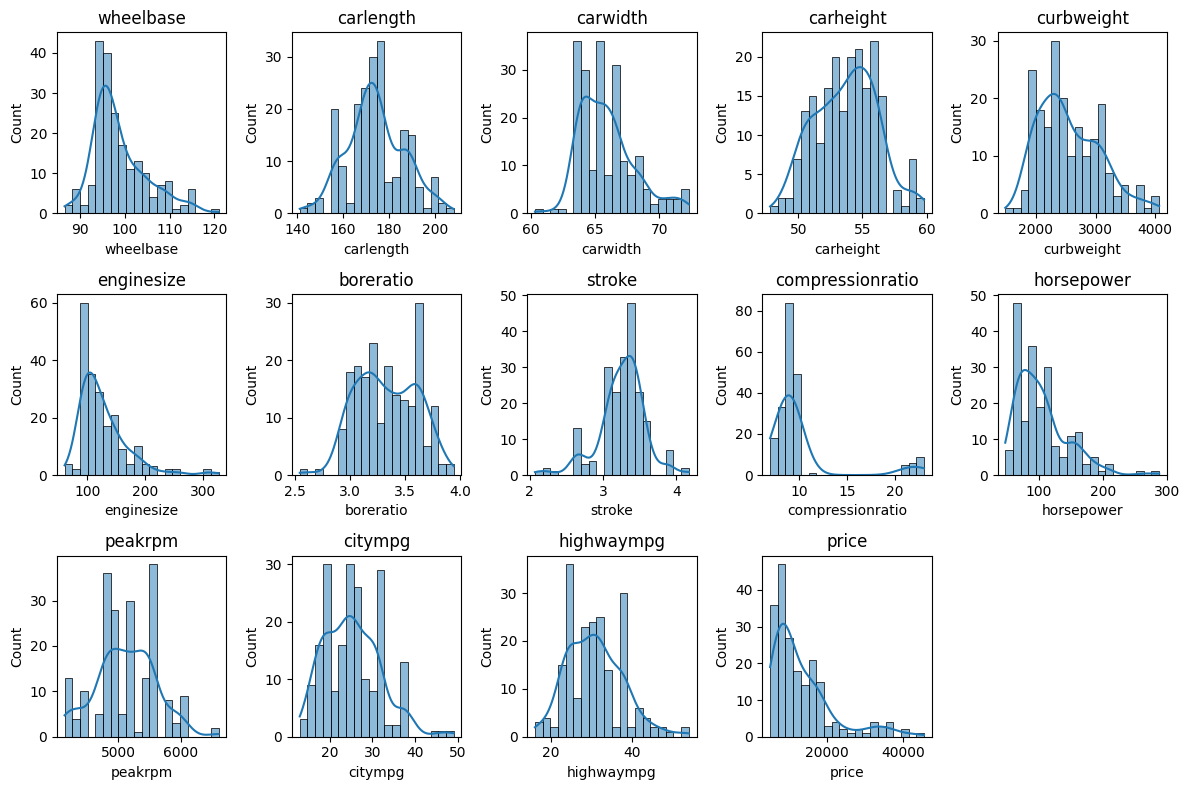

In [46]:
# Distribution of Numerical Features
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

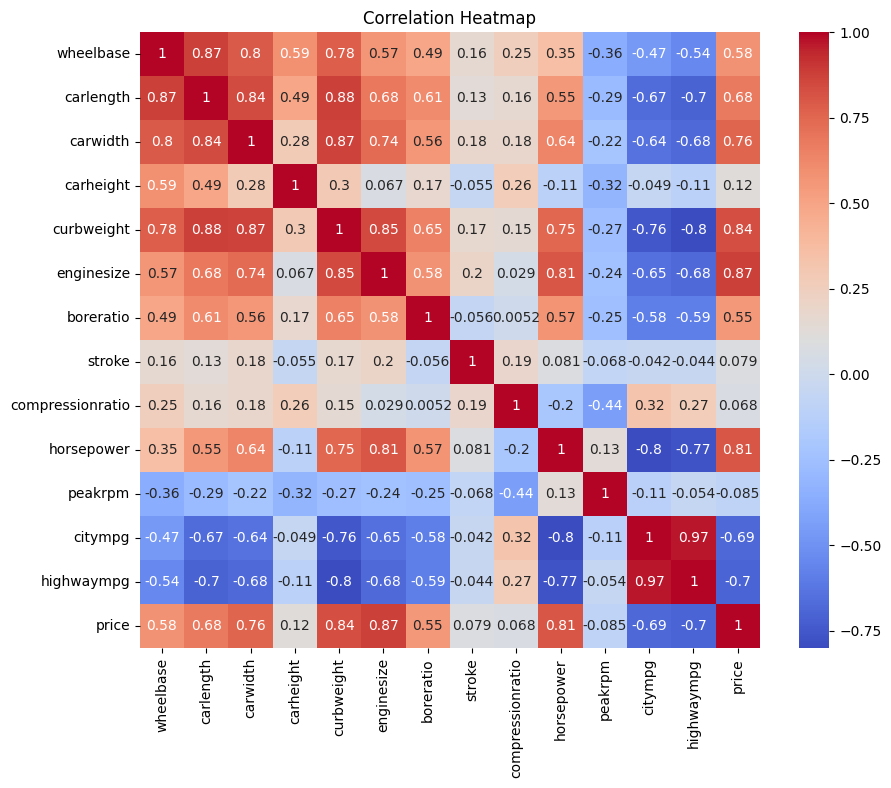

In [47]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data preprocessing

In [51]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarName']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])